In [1]:
# INPUT: experiment name
study_name = 'homing_cmpt'
experiment_name = 'sp' # market type
var_name = 'start_reg_plf_share'
all_values = [0.1, 0.3, 0.5, 0.7, 0.9]
ref_value = 0.5
cmpt_types = ['sp']
# var_dict = {'cmpt_type': ['s', 'p', 'ss', 'pp', 'sp']}  # assumes full enumeration

In [2]:
# Create var dict based on input
var_dict = {'cmpt_type': cmpt_types, var_name: all_values}  # assumes full enumeration

In [3]:
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
path = os.getcwd()
res_path = path

In [4]:
# Make folder for experiment if it doesn't exist
experiment_path = os.path.join(res_path, 'plots', experiment_name + '-' + var_name)
if not os.path.exists(os.path.join(res_path, 'plots')):
    os.mkdir(os.path.join(res_path, 'plots'))
if not os.path.exists(experiment_path):
    os.mkdir(experiment_path)

In [5]:
# Determine scenarios - enumerating based on input
keys, values_lists = zip(*var_dict.items())
scenarios = list(itertools.product(*values_lists))
scenario_names = ['-'.join(f"{key}-{value}" for key, value in zip(keys, scenario)) for scenario in scenarios]
scenario_names = [s.replace('cmpt_type-','') for s in scenario_names]  # drop 'cmpt_type' from scn name

In [6]:
def open_pickle_repl(scn_dict, aggr_scn_path, pkl_name):
    with open(os.path.join(aggr_scn_path, pkl_name), 'rb') as f:
        df = pickle.load(f)
        print(df)
        for key, value in scn_dict.items():
            df[key] = value
        index_list = [key for key in scn_dict] + ['repl', 'day']
        df = df.reset_index().set_index(index_list)
    return df

In [7]:
scenario_names

['sp-start_reg_plf_share-0.1',
 'sp-start_reg_plf_share-0.3',
 'sp-start_reg_plf_share-0.5',
 'sp-start_reg_plf_share-0.7',
 'sp-start_reg_plf_share-0.9']

In [8]:
# Loop over scenarios, creating list of df's containing the data, and converting to single df
aggr_dem_list = []
aggr_sup_list = []
# mode_no_rs_list = []
mode_df = pd.DataFrame()
for scn_name in scenario_names:
    # Determine scenario values and save them to dict
    scn_name_split = scn_name.split('-')
    scn_dict = {}
    for i in range(1, len(scn_name_split), 2):
        variable_name = scn_name_split[i]
        print(variable_name)
        variable_value = scn_name_split[i + 1]
        print(variable_value)
        scn_dict[variable_name] = variable_value
    scn_dict['cmpt_type'] = scn_name_split[0]
    # List all folders and find those corresponding to the specific scenario
    aggr_scn_path = os.path.join(res_path, 'aggr_repl', scn_name) if float(variable_value) != ref_value else os.path.join(res_path, 'aggr_repl', scn_name.split("-")[0])
    all_items = os.listdir(aggr_scn_path)
    aggr_dem = open_pickle_repl(scn_dict, aggr_scn_path, 'repl_dem_select.pkl')
    aggr_sup = open_pickle_repl(scn_dict, aggr_scn_path, 'repl_sup_select.pkl')

    # with open(os.path.join(aggr_scn_path, 'mode_no_rs.pkl'), 'rb') as f:
    #     mode_series = pickle.load(f)
    #     for key, value in scn_dict.items():
    #         mode_series[key] = value
    #     mode_df = mode_df.append(mode_series, ignore_index=True)
    aggr_dem_list = aggr_dem_list + [aggr_dem]
    aggr_sup_list = aggr_sup_list + [aggr_sup]
    # mode_no_rs_list = mode_no_rs_list + [df]
aggr_dem = pd.concat(aggr_dem_list)
aggr_sup = pd.concat(aggr_sup_list)
# mode_no_rs = pd.concat(mode_no_rs_list)

start_reg_plf_share
0.1
          informed_mh  informed_sh  registered_mh  registered_sh_0  \
repl day                                                             
0    0            NaN         8968            NaN              631   
     1            NaN        11190            NaN              693   
     2            NaN        13203            NaN              690   
     3            NaN        15045            NaN              783   
     4            NaN        16773            NaN              809   
...               ...          ...            ...              ...   
2    204          NaN        30856            NaN                1   
     205          NaN        30856            NaN                2   
     206          NaN        30856            NaN                2   
     207          NaN        30856            NaN                2   
     208          NaN        30856            NaN                2   

          registered_sh_1  requests_mh  requests_sh_0  requests_s

In [9]:
# # aggr_dem.columns = aggr_dem.columns.droplevel(0)
# # aggr_dem.columns.name = None               #remove categories
# aggr_dem = aggr_dem.reset_index().set_index(['cmpt_type','repl','day'])   
# aggr_dem
# # aggr_dem.reset_index()
# # aggr_dem.requests_0

In [10]:
aggr_dem.keys()

Index(['informed_mh', 'informed_sh', 'registered_mh', 'registered_sh_0',
       'registered_sh_1', 'requests_mh', 'requests_sh_0', 'requests_sh_1',
       'gets_offer_mh_0', 'gets_offer_mh_1', 'gets_offer_sh_0',
       'gets_offer_sh_1', 'accepts_offer_mh_0', 'accepts_offer_mh_1',
       'exp_wait_mh', 'exp_wait_sh_0', 'exp_wait_sh_1', 'exp_corr_wait_mh',
       'exp_corr_wait_sh_0', 'exp_corr_wait_sh_1', 'exp_detour_mh',
       'exp_detour_sh_0', 'exp_detour_sh_1', 'exp_km_fare_mh',
       'exp_km_fare_sh_0', 'exp_km_fare_sh_1', 'perc_wait_mh',
       'perc_wait_sh_0', 'perc_wait_sh_1', 'perc_detour_mh',
       'perc_detour_sh_0', 'perc_detour_sh_1', 'perc_km_fare_mh',
       'perc_km_fare_sh_0', 'perc_km_fare_sh_1'],
      dtype='object')

In [11]:
# Add scenario label
non_day_level = [level for level in aggr_dem.index.names if level != 'day' and level !='repl'] # Find the scenario indices
if len(non_day_level) == 1:
    aggr_dem['label'] = aggr_dem.index.get_level_values(non_day_level[0])
    aggr_sup['label'] = aggr_sup.index.get_level_values(non_day_level[0])
else:
    aggr_dem['label'] = aggr_dem.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row))
    aggr_sup['label'] = aggr_sup.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row))

In [12]:
non_day_level

['start_reg_plf_share', 'cmpt_type']

In [13]:
aggr_sup.exp_inc_sh_1
# result = aggr_sup.groupby(level='day').sum().xs(('sp', 0), level=['cmpt_type', 'repl'])

start_reg_plf_share  cmpt_type  repl  day
0.1                  sp         0     0       59.461135
                                      1       70.616068
                                      2       83.617302
                                      3       97.551676
                                      4      103.783736
                                                ...    
0.9                  sp         2     203      0.000000
                                      204      0.000000
                                      205      0.000000
                                      206      0.000000
                                      207      0.000000
Name: exp_inc_sh_1, Length: 6155, dtype: float64

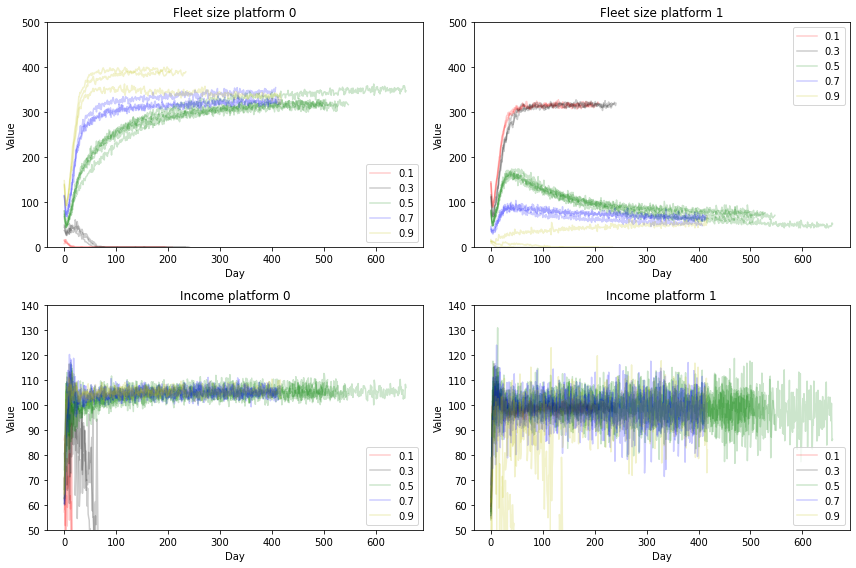

In [14]:
# Get unique 'a' values
# unique_cmpt_values = aggr_sup.index.get_level_values('cmpt_type').unique()
unique_cmpt_values = aggr_sup.index.get_level_values(var_name).unique()

# Create subplots
fig, axes = plt.subplots(2,2, figsize=(12, 8))

indicators = ['ptcp_sh', 'exp_inc_sh']
indicator_labels = ['Fleet size', 'Income']
colors = ['r','k','g','b','y']

for i, cmpt_type in enumerate(unique_cmpt_values):
    for j, indicator in enumerate(indicators):
        for plf in [0,1]:
            ax = axes[j, plf]
            for repl in aggr_sup.xs((cmpt_type,cmpt_types[0])).index.get_level_values('repl').unique():
                subset = aggr_sup.loc[(cmpt_type, cmpt_types[0], repl), indicator + '_{}'.format(plf)]
                day_values = subset.index.get_level_values('day')
                values = subset.values
                non_nan_indices = ~np.isnan(values)
                if repl == aggr_sup.xs((cmpt_type, cmpt_types[0])).index.get_level_values('repl').unique()[-1]:
                    ax.plot(day_values[non_nan_indices], values[non_nan_indices], label='{}'.format(cmpt_type),color=colors[i], alpha=0.2)
                else:
                    ax.plot(day_values[non_nan_indices], values[non_nan_indices],color=colors[i], alpha=0.2)
            # ax.set_title(f'a={a_value} - {column}')
            ax.set_xlabel('Day')
            ax.set_ylabel('Value')
            ax.set_title('{} platform {}'.format(indicator_labels[j],plf))
            ax.legend()

axes[0,0].set_ylim(0,500)
axes[0,1].set_ylim(0,500)
axes[1,0].set_ylim(50,140)
axes[1,1].set_ylim(50,140)

plt.tight_layout()
plt.savefig(os.path.join(experiment_path,'Evo-supply.png'), facecolor='w')
plt.show()


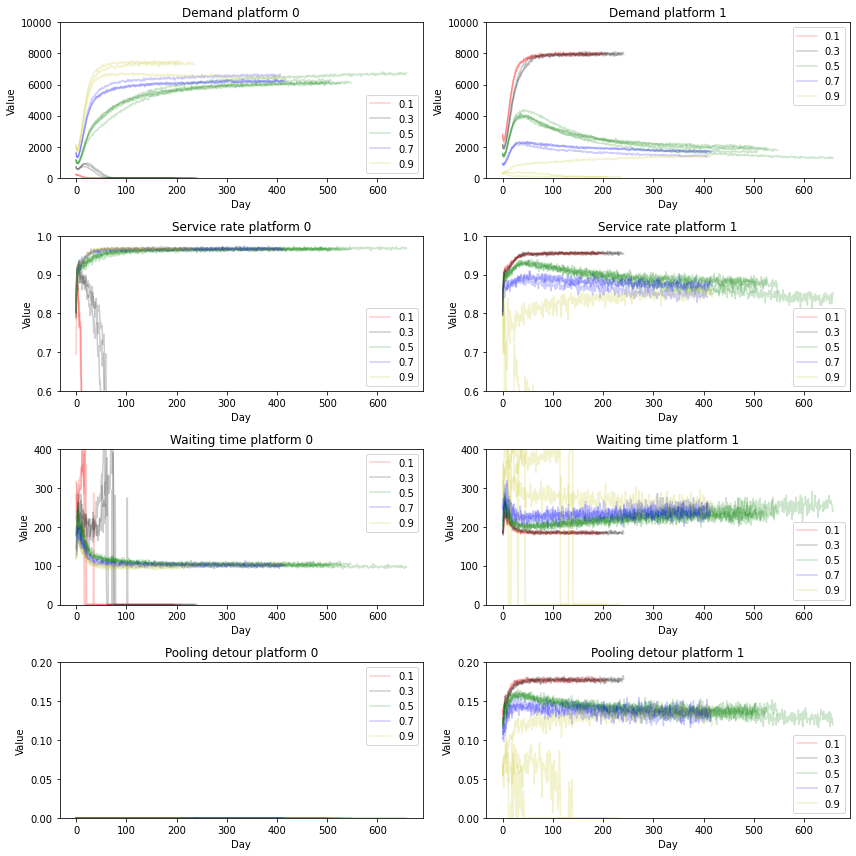

In [15]:
# Get unique 'a' values
# unique_cmpt_values = aggr_dem.index.get_level_values('cmpt_type').unique()
unique_cmpt_values = aggr_dem.index.get_level_values(var_name).unique()

# Create subplots
fig, axes = plt.subplots(4,2, figsize=(12, 12))

aggr_dem['service_rate_sh_0'] = aggr_dem['gets_offer_sh_0'] / aggr_dem['requests_sh_0']
aggr_dem['service_rate_sh_1'] = aggr_dem['gets_offer_sh_1'] / aggr_dem['requests_sh_1']

indicators = ['requests_sh', 'service_rate_sh', 'exp_wait_sh', 'exp_detour_sh']
indicator_labels = ['Demand', 'Service rate', 'Waiting time', 'Pooling detour']
colors = ['r','k','g','b','y']

for i, cmpt_type in enumerate(unique_cmpt_values):
    for j, indicator in enumerate(indicators):
        for plf in [0,1]:
            ax = axes[j, plf]
            for repl in aggr_dem.xs((cmpt_type, cmpt_types[0])).index.get_level_values('repl').unique():
                subset = aggr_dem.loc[(cmpt_type, cmpt_types[0], repl), indicator + '_{}'.format(plf)]
                day_values = subset.index.get_level_values('day')
                values = subset.values
                non_nan_indices = ~np.isnan(values)
                if repl == aggr_dem.xs((cmpt_type, cmpt_types[0])).index.get_level_values('repl').unique()[-1]:
                    ax.plot(day_values[non_nan_indices], values[non_nan_indices], label='{}'.format(cmpt_type),color=colors[i], alpha=0.2)
                else:
                    ax.plot(day_values[non_nan_indices], values[non_nan_indices],color=colors[i], alpha=0.2)
            # ax.set_title(f'a={a_value} - {column}')
            ax.set_xlabel('Day')
            ax.set_ylabel('Value')
            ax.set_title('{} platform {}'.format(indicator_labels[j],plf))
            ax.legend()

axes[0,0].set_ylim(0,10000)
axes[0,1].set_ylim(0,10000)
axes[1,0].set_ylim(0.6,1)
axes[1,1].set_ylim(0.6,1)
axes[2,0].set_ylim(0,400)
axes[2,1].set_ylim(0,400)
axes[3,0].set_ylim(0,0.2)
axes[3,1].set_ylim(0,0.2)

plt.tight_layout()
plt.savefig(os.path.join(experiment_path,'Evo-demand.png'), facecolor='w')
plt.show()

In [16]:
aggr_dem.xs(('3',cmpt_types[0],2)).requests_sh_0.plot()

KeyError: ('3', 'sp', 2)

In [ ]:
# conv_steady_days = 10
# moving_average_days = 50
# eql_dem = aggr_dem.groupby(['label'], sort=False).tail(conv_steady_days + moving_average_days).groupby(['label'],sort=False).mean()
# eql_sup = aggr_sup.groupby(['label'], sort=False).tail(conv_steady_days + moving_average_days).groupby(['label'],sort=False).mean()

In [ ]:
# # Create subplots within a single figure
# n_rows = 2
# n_cols = 4
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10))

# indicators = ['registered_sh', 'requests_sh','service_rate_sh', 'exp_wait_sh', 'exp_detour_sh', 'registered_sh', 'ptcp_sh', 'exp_inc_sh']
# stacked = [True, True, False, False, False, True, True, False]
# type = ['dem', 'dem', 'dem', 'dem', 'dem', 'sup', 'sup', 'sup']

# i = 0
# for j, indicator in enumerate(indicators):
    
#     k = j - i*n_cols
#         # ax.bar(height=eql_dem[indicators[j]], x=eql_dem.index.values)
    
#     if type[j] == 'dem':
#         if stacked[j]:
#             eql_dem[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=True, ax = axes[i, k], width=0.8)
#         else:
#             eql_dem[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=False, ax = axes[i, k], width = 0.8)
#     else:
#         if stacked[j]:
#             eql_sup[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=True, ax = axes[i, k], width=0.8)
#         else:
#             eql_sup[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=False, ax = axes[i, k], width = 0.8)
    
#     ax.set_xlabel('Day')
#     ax.set_ylabel(indicators[j])
#     ax.set_title(f'Column: {indicators[j]}')
#     ax.legend()

#     if j == n_cols-1:
#         i+=1


# axes[0,0].set_ylim(0,35000)
# # axes[0,1].set_ylim(0,10000)

# plt.tight_layout()
# plt.savefig('Eql-dem-indicators.png', facecolor='w')

(0.0, 415.0)

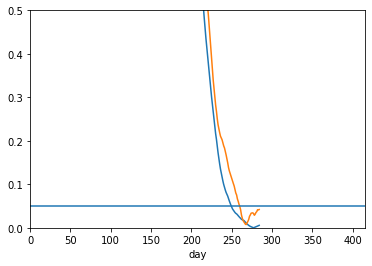

In [ ]:
aggr_sup.xs(('3', cmpt_types[0], 1), level=[var_name, 'cmpt_type', 'repl']).ptcp_sh_0.rolling(25).mean().rolling(100).mean().diff().abs().plot()
aggr_sup.xs(('3', cmpt_types[0], 1), level=[var_name, 'cmpt_type', 'repl']).ptcp_sh_1.rolling(25).mean().rolling(100).mean().diff().abs().plot()
# aggr_sup.xs(('sp', 3), level=['cmpt_type', 'repl']).ptcp_0.rolling(25).mean().rolling(50).mean().diff().abs().plot()
plt.axhline(y=0.05)
# plt.axhline(y=0.1)
plt.ylim(0,0.5)
plt.xlim(0,415)

# aggr_sup.xs(('sp', 4), level=['cmpt_type', 'repl']).ptcp_sh_1.rolling(25).mean().rolling(50).mean().tail(10).diff().abs() < 10

<AxesSubplot:xlabel='day'>

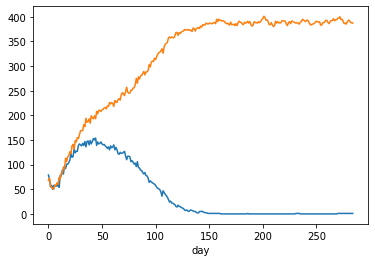

In [ ]:
aggr_sup.xs(('3', cmpt_types[0], 1), level=[var_name, 'cmpt_type', 'repl']).ptcp_sh_0.plot()
aggr_sup.xs(('3', cmpt_types[0], 1), level=[var_name, 'cmpt_type', 'repl']).ptcp_sh_1.plot()

In [ ]:
aggr_sup.xs(('0.1'), level='start_reg_plf_share').head(20)

informed_mh  informed_sh  registered_mh  registered_sh_0  \
cmpt_type repl day                                                             
sp        0    0            NaN          641            NaN               24   
               1            NaN          750            NaN               23   
               2            NaN          837            NaN               20   
               3            NaN          906            NaN               19   
               4            NaN          971            NaN               19   
               5            NaN         1033            NaN               17   
               6            NaN         1088            NaN               15   
               7            NaN         1154            NaN               13   
               8            NaN         1228            NaN               11   
               9            NaN         1291            NaN                9   
               10           NaN         1349            NaN                9   
               11           NaN         1419            NaN                8   
               12           NaN         1481            NaN                6   
               13           NaN         1539            NaN                6   
               14           NaN         1595            NaN                5   
               15           NaN         1649            NaN                3   
               16           NaN         1708            NaN                3   
               17           NaN         1756            NaN                3   
               18           NaN         1807            NaN                3   
               19           NaN         1855            NaN                2   

                    registered_sh_1  ptcp_mh  ptcp_sh_0  ptcp_sh_1  \
cmpt_type repl day                                                   
sp        0    0                207      NaN         14        141   
               1                195      NaN         14        119   
               2                193      NaN         11         97   
               3                194      NaN          9         93   
               4                189      NaN          8         90   
               5                189      NaN          6         97   
               6                187      NaN          5        101   
               7                192      NaN          4        107   
               8                198      NaN          2        113   
               9                211      NaN          2        124   
               10               221      NaN          1        134   
               11               222      NaN          1        142   
               12               234      NaN          1        146   
               13               229      NaN          0        159   
               14               228      NaN          0        156   
               15               226      NaN          0        157   
               16               226      NaN          0        158   
               17               224      NaN          0        159   
               18               223      NaN          0        158   
               19               218      NaN          0        157   

                    exp_inc_mh  exp_inc_sh_0  ...  perc_inc_mh  perc_inc_sh_0  \
cmpt_type repl day                            ...                               
sp        0    0           NaN     70.676071  ...          NaN      94.505834   
               1           NaN     61.809464  ...          NaN      78.623125   
               2           NaN     65.631364  ...          NaN      73.035214   
               3           NaN     72.561389  ...          NaN      72.942439   
               4           NaN     68.586562  ...          NaN      71.948510   
               5           NaN     73.953750  ...          NaN      72.318174   
               6           NaN     65.675500  ...          NaN      71

(0.0, 10.0)

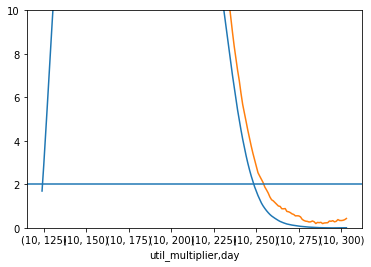

In [ ]:
aggr_dem.xs((cmpt_types[0], 4), level=['cmpt_type', 'repl']).requests_sh_0.rolling(25).mean().rolling(100).mean().diff().abs().plot()
aggr_dem.xs((cmpt_types[0], 4), level=['cmpt_type', 'repl']).requests_sh_1.rolling(25).mean().rolling(100).mean().diff().abs().plot()
# aggr_sup.xs(('sp', 3), level=['cmpt_type', 'repl']).ptcp_0.rolling(25).mean().rolling(50).mean().diff().abs().plot()
# plt.axhline(y=0)
plt.axhline(y=2)
plt.ylim(0,10)
# plt.xlim(0,415)

In [ ]:
# Create df with market (system) level indicators
aggr_dem_reset = aggr_dem.reset_index()
aggr_sup_reset = aggr_sup.reset_index()
market_df = aggr_dem_reset.reset_index().copy()[['day','label']]
market_df['tot_regist_dem'] = aggr_dem_reset.registered_mh + aggr_dem_reset.registered_sh_0 + aggr_dem_reset.registered_sh_1.fillna(0)
market_df['market_share'] = (aggr_dem_reset.accepts_offer_0 + aggr_dem_reset.accepts_offer_1.fillna(0)) / 100000
# market_df['exp_wait'] = aggr_dem_reset.corr_xp_wait
# market_df['exp_ivt'] = aggr_dem_reset.xp_ivt
market_df['tot_regist_sup'] = aggr_sup_reset.registered_mh + aggr_sup_reset.registered_sh_0 + aggr_sup_reset.registered_sh_1.fillna(0)
market_df['tot_ptcp'] = aggr_sup_reset.ptcp_mh + aggr_sup_reset.ptcp_sh_0 + aggr_sup_reset.ptcp_sh_1.fillna(0)
market_df['exp_inc'] = aggr_sup_reset.exp_inc
# market_df['perc_inc_reg_mh'] = aggr_sup_reset.perc_inc_reg_mh
# market_df['perc_inc_notreg_mh'] = aggr_sup_reset.perc_inc_notreg_mh
market_df['rel_pickup_dist'] = aggr_sup_reset.pickup_dist / market_df.market_share / 100000
market_df['rel_repos_dist'] = aggr_sup_reset.repos_dist / market_df.market_share / 100000
market_df['rel_serving_dist'] = (aggr_sup_reset.km_occ_1.fillna(0) + aggr_sup_reset.km_occ_2.fillna(0) + aggr_sup_reset.km_occ_3.fillna(0) + aggr_sup_reset.km_occ_4.fillna(0)) / market_df.market_share / 100000
market_df['driver_per_req'] = market_df.tot_ptcp / market_df.market_share / 100000
market_df['service_rate'] = (aggr_dem_reset.accepts_offer_0 + aggr_dem_reset.accepts_offer_1.fillna(0)) / (aggr_dem_reset.requests_mh + aggr_dem_reset.requests_sh_0 + aggr_dem_reset.requests_sh_1.fillna(0))
market_df['service_rate_0'] = aggr_dem_reset.gets_offer_0 / aggr_dem_reset.requests_0
market_df['service_rate_1'] = aggr_dem_reset.gets_offer_1 / aggr_dem_reset.requests_1

AttributeError: 'DataFrame' object has no attribute 'accepts_offer_0'

In [ ]:
# plot data in stack manner of bar type
eql_dem['rs'] = eql_dem.accepts_offer_0 + eql_dem.accepts_offer_1.fillna(0)

# Create the stacked bar chart
ax = (eql_dem[['rs','bike','car','pt']] / 100000 * 100).reset_index().plot(x='label', kind='bar', stacked=True,
        title='Modal share under different ridesourcing service types')

# # Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, labels=[f'{h:.2f}' for h in container.get_heights()])

# Label bars with their values
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.1f%%')
# Show the plot
plt.ylabel('Modal share (%)')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

NameError: name 'eql_dem' is not defined

In [ ]:
eql_dem.keys()

Index(['informed', 'registered_0', 'requests_0', 'gets_offer_0',
       'accepts_offer_0', 'bike', 'car', 'pt', 'time_occ_1',
       'init_perc_wait_0', 'xp_wait_0', 'corr_xp_wait_0', 'init_perc_ivt_0',
       'xp_ivt_0', 'init_perc_km_fare_0', 'xp_km_fare_0', 'informed_mh',
       'informed_sh', 'registered_mh', 'registered_sh_0', 'registered_sh_1',
       'requests_mh', 'requests_sh_0', 'requests_sh_1', 'gets_offer_mh_0',
       'gets_offer_mh_1', 'gets_offer_sh_0', 'gets_offer_sh_1',
       'accepts_offer_mh_0', 'accepts_offer_mh_1', 'exp_wait_mh',
       'exp_wait_sh_0', 'exp_wait_sh_1', 'exp_corr_wait_mh',
       'exp_corr_wait_sh_0', 'exp_corr_wait_sh_1', 'exp_ivt_mh',
       'exp_ivt_sh_0', 'exp_ivt_sh_1', 'exp_km_fare_mh', 'exp_km_fare_sh_0',
       'exp_km_fare_sh_1', 'perc_wait_mh', 'perc_wait_sh_0', 'perc_wait_sh_1',
       'perc_ivt_mh', 'perc_ivt_sh_0', 'perc_ivt_sh_1', 'perc_km_fare_mh',
       'perc_km_fare_sh_0', 'perc_km_fare_sh_1', 'eff_pax_dist_0',
       'eff_pax_di

In [ ]:
mode_df

,no_rs_bike,no_rs_car,no_rs_pt,other_trav_bike,other_trav_car,other_trav_pt
label,,,,,,
s,15254.2,10212.2,6016.4,57613.8,8337.6,2565.8
p,15254.2,10212.2,6016.4,57613.8,8337.6,2565.8
ss,15254.2,10212.2,6016.4,57613.8,8337.6,2565.8
pp,15254.2,10212.2,6016.4,57613.8,8337.6,2565.8
sp,15254.2,10212.2,6016.4,57613.8,8337.6,2565.8


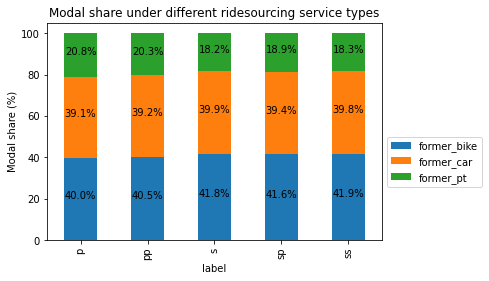

In [ ]:
# Create the stacked bar chart
ax = (eql_dem[['former_bike','former_car','former_pt']]).div((eql_dem['requests_0'] + eql_dem['requests_1'].fillna(0)) / 100, axis=0).reset_index().plot(x='label', kind='bar', stacked=True,
        title='Modal share under different ridesourcing service types')

# # Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, labels=[f'{h:.2f}' for h in container.get_heights()])

# Label bars with their values
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.1f%%')
# Show the plot
plt.ylabel('Modal share (%)')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

# waarom 50 procent bij requests_sh_0, requests_sh_1 en requests_mh, gaat iets fout? heeft iets met singlehoming en multihoming te maken? bars zijn ook niet helemaal gelijk?
# dit plaatje met accepts_offer kan meer zijn dan 1 omdat er ook requests worden afggewezen?
# Note: requests is niet goed als er multi-homers zijn. Bars zijn ook niet allemaal gelijk?

In [ ]:
eql_sup.perc_inc_sh_1

label
p            NaN
pp     90.855327
s            NaN
sp     92.517338
ss    103.892037
Name: perc_inc_sh_1, dtype: float64

In [ ]:
eql_dem.former_bike + eql_dem.former_car + eql_dem.former_pt

label
p     7689.365000
pp    8253.585000
s     8274.950000
sp    8585.223333
ss    8475.010000
dtype: float64

In [ ]:
eql_dem.eff_pax_dist_0 / 1000

label
p     47533.505327
pp    25584.902239
s     51745.611390
sp    34966.154447
ss    26476.082616
Name: eff_pax_dist_0, dtype: float64

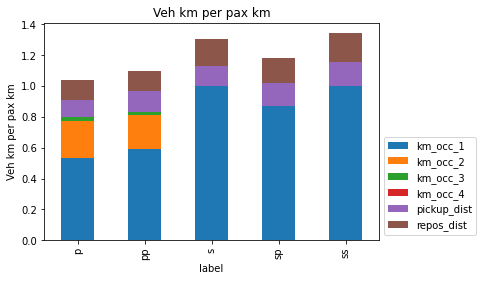

In [ ]:
# Create the stacked bar chart
ax = (eql_sup[['km_occ_1','km_occ_2','km_occ_3','km_occ_4','pickup_dist','repos_dist']]).div((eql_dem['eff_pax_dist_0'] + eql_dem['eff_pax_dist_1'].fillna(0)) / 1000, axis=0).reset_index().plot(x='label', kind='bar', stacked=True,
        title='Veh km per pax km')

# # Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, labels=[f'{h:.2f}' for h in container.get_heights()])

# Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.2f')
# Show the plot
plt.ylabel('Veh km per pax km')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
aggr_sup.xs('s',level=0,axis=0).exp_inc_sh_0.tail(20)

day
185    109.040644
186    109.076793
187    109.409295
188    107.938524
189    107.399305
190    107.638087
191    108.258073
192    107.999924
193    108.714377
194    107.990775
195    108.874167
196    108.769705
197    108.490569
198    108.642437
199    107.078370
200    107.857525
201    106.723025
202    108.418285
203    109.111213
204    107.587786
Name: exp_inc_sh_0, dtype: float64

In [ ]:
aggr_sup.xs('s',level=0,axis=0).perc_inc_sh_0.tail(20)

day
185    107.807821
186    107.899680
187    108.019020
188    108.124763
189    108.088479
190    107.972919
191    107.988397
192    107.932681
193    107.894790
194    107.999644
195    107.969617
196    107.987790
197    108.021464
198    108.010366
199    108.038841
200    107.847840
201    107.715811
202    107.221594
203    107.874413
204    108.563100
Name: perc_inc_sh_0, dtype: float64

<AxesSubplot:xlabel='day'>

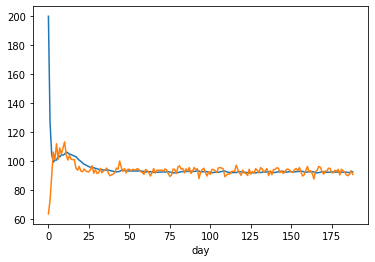

In [ ]:
aggr_sup.xs('sp',level=0,axis=0).perc_inc_sh_1.plot()
aggr_sup.xs('sp',level=0,axis=0).exp_inc_sh_1.plot()